In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


# Loading the data

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s5e4/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s5e4/test.csv")
df_sample = pd.read_csv("/kaggle/input/playground-series-s5e4/sample_submission.csv")

In [3]:
df_train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
df_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [5]:
df_sample.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


# EDA

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


#

In [7]:
df_train.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
count,750000.000000,750000,750000,662907.000000,750000,750000.000000,750000,750000,603970.000000,749999.000000,750000,750000.000000
unique,NaN,48,100,NaN,10,NaN,7,4,NaN,NaN,3,NaN
top,NaN,Tech Talks,Episode 71,NaN,Sports,NaN,Sunday,Night,NaN,NaN,Neutral,NaN
freq,NaN,22847,10515,NaN,87606,NaN,115946,196849,NaN,NaN,251291,NaN
mean,374999.500000,NaN,NaN,64.504738,NaN,59.859901,NaN,NaN,52.236449,1.348855,NaN,45.437406
std,216506.495284,NaN,NaN,32.969603,NaN,22.873098,NaN,NaN,28.451241,1.151130,NaN,27.138306
min,0.000000,NaN,NaN,0.000000,NaN,1.300000,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,187499.750000,NaN,NaN,35.730000,NaN,39.410000,NaN,NaN,28.380000,0.000000,NaN,23.178350
50%,374999.500000,NaN,NaN,63.840000,NaN,60.050000,NaN,NaN,53.580000,1.000000,NaN,43.379460
75%,562499.250000,NaN,NaN,94.070000,NaN,79.530000,NaN,NaN,76.600000,2.000000,NaN,64.811580


In [8]:
df_train.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [9]:
df_train[df_train["Number_of_Ads"].isna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
247170,247170,Game Day,Episode 33,35.66,Sports,27.35,Friday,Evening,49.87,NaN,Negative,23.94516


In [10]:
df_test.isna().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [11]:
df_train['Guest_Popularity_percentage'] = df_train.groupby(by= ['Podcast_Name'])['Guest_Popularity_percentage'].transform(
    lambda x: x.fillna(x.mean())
)

df_train['Episode_Length_minutes'] = df_train.groupby(by= ['Podcast_Name'])['Episode_Length_minutes'].transform(
    lambda x: x.fillna(x.mean())
)

df_train['Number_of_Ads'] = df_train.groupby(by= ['Podcast_Name'])['Number_of_Ads'].transform(
    lambda x: x.fillna(x.mean())
)

In [12]:
df_test['Guest_Popularity_percentage'] = df_train.groupby(by= ['Podcast_Name'])['Guest_Popularity_percentage'].transform(
    lambda x: x.fillna(x.mean())
)

df_test['Episode_Length_minutes'] = df_train.groupby(by= ['Podcast_Name'])['Episode_Length_minutes'].transform(
    lambda x: x.fillna(x.mean())
)

<Axes: xlabel='Publication_Day'>

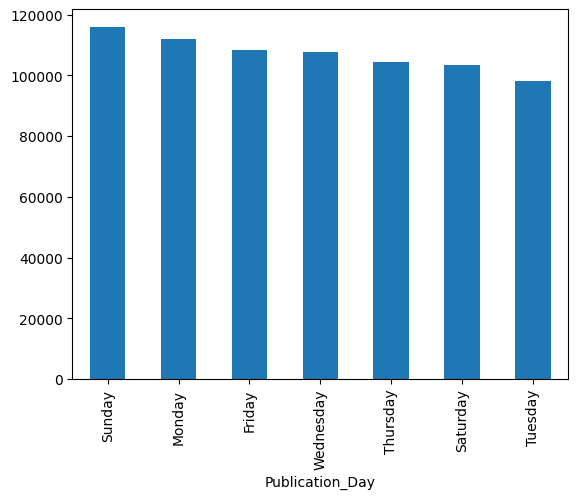

In [13]:
df_train["Publication_Day"].value_counts().plot(kind= "bar")

<Axes: xlabel='Publication_Time'>

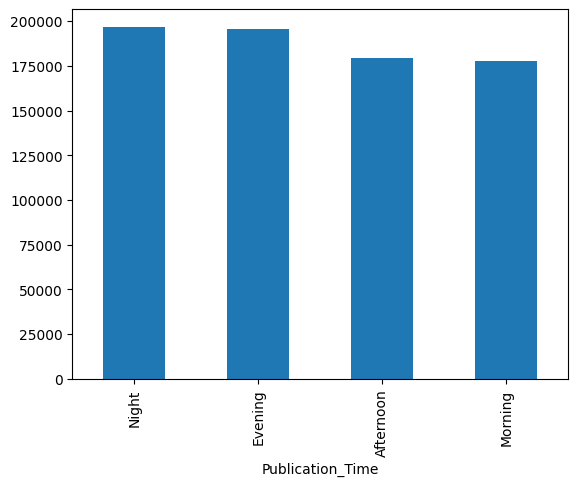

In [14]:
df_train["Publication_Time"].value_counts().plot(kind= "bar")

In [15]:
df_train.dtypes.index

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [16]:
df_train['Episode_Number'] = df_train['Episode_Title'].str.extract(r'(\d+)').astype(int)
df_test['Episode_Number'] = df_test['Episode_Title'].str.extract(r'(\d+)').astype(int)

In [17]:
df_train["Episode_Title"].value_counts()

Episode_Title
Episode 71    10515
Episode 62    10373
Episode 31    10292
Episode 61     9991
Episode 69     9864
              ...  
Episode 2      5134
Episode 25     5117
Episode 41     4965
Episode 37     4940
Episode 95     4838
Name: count, Length: 100, dtype: int64

In [18]:
df_train.drop(columns= ["Episode_Title"],inplace=True)
df_test.drop(columns= ["Episode_Title"],inplace=True)

In [19]:
df_train.set_index(keys = ["id"],inplace = True)
df_test.set_index(keys = ["id"],inplace = True)

In [20]:
df_train.dtypes

Podcast_Name                    object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
Episode_Number                   int64
dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


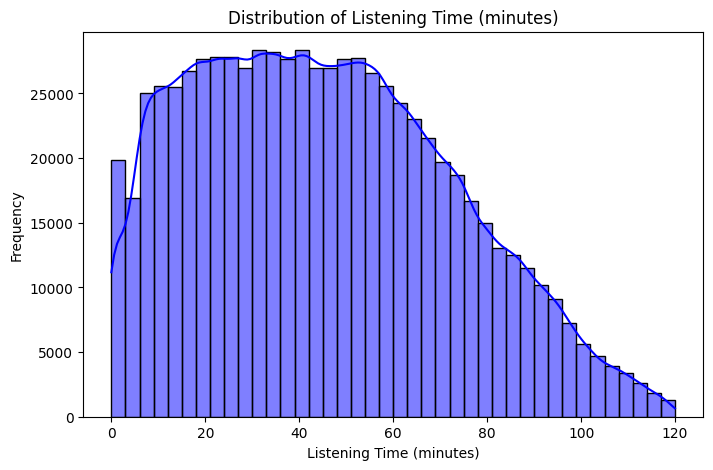

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_train['Listening_Time_minutes'], bins=40, kde=True, color='blue')
plt.title("Distribution of Listening Time (minutes)")
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Frequency")
plt.show()

In [22]:
df_train.corr(numeric_only=True)

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Number
Episode_Length_minutes,1.000000,0.022232,-0.008358,-0.051819,0.866202,-0.018825
Host_Popularity_percentage,0.022232,1.000000,0.020069,-0.017896,0.050870,0.018267
Guest_Popularity_percentage,-0.008358,0.020069,1.000000,0.007020,-0.014403,0.037622
Number_of_Ads,-0.051819,-0.017896,0.007020,1.000000,-0.118337,0.005297
Listening_Time_minutes,0.866202,0.050870,-0.014403,-0.118337,1.000000,-0.017321
Episode_Number,-0.018825,0.018267,0.037622,0.005297,-0.017321,1.000000


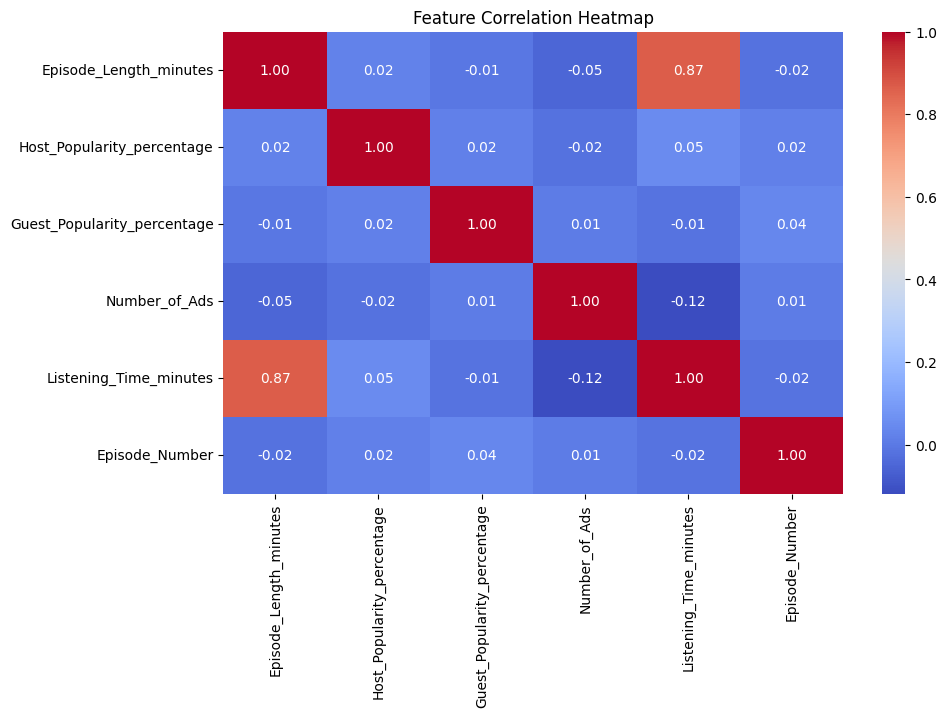

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Cateforical Data One Hot Encoding

In [24]:
categorical_cols = list(df_train.dtypes[df_train.dtypes =="object"].index)

In [25]:
categorical_cols

['Podcast_Name',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [26]:
df_encoded = pd.get_dummies(df_train, columns=categorical_cols,drop_first= True)
df_encoded_test = pd.get_dummies(df_test, columns=categorical_cols,drop_first= True)

In [27]:
df_encoded.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Number,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,...,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
id,,,,,,,,,,,,,,,,,,,,,
0,64.388461,74.81,52.241037,0.0,31.41998,98,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,119.800000,66.95,75.950000,2.0,88.01241,26,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,73.900000,69.97,8.970000,0.0,44.92531,16,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,67.170000,57.22,78.700000,2.0,46.27824,45,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,110.510000,80.07,58.680000,3.0,75.61031,86,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [28]:
X = df_encoded.drop(['Listening_Time_minutes'], axis=1)
y = df_encoded['Listening_Time_minutes']

# Train test split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
# Optional: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Trainning

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 12.70350405869086
R² Score: 0.7806835822681335


In [32]:
!pip uninstall -y xgboost
!pip install xgboost==1.7.6

Found existing installation: xgboost 2.0.3
Uninstalling xgboost-2.0.3:
  Successfully uninstalled xgboost-2.0.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 8.6 MB/s eta 0:00:00


In [33]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Optuna objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),

        # GPU settings
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'random_state': 42,
        'n_jobs': -1
    }

    model = xgb.XGBRegressor(**params)

    # 3-fold CV, using negative RMSE for Optuna (minimization)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    return -score.mean()

# Create and run the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Best parameters and model
print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_params)

[I 2025-04-06 16:55:05,315] A new study created in memory with name: no-name-ee460297-f3a3-476c-a038-e4701e9e30e0


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-04-06 16:56:34,211] Trial 0 finished with value: 13.756175072600989 and parameters: {'n_estimators': 148, 'max_depth': 19, 'learning_rate': 0.2995889318750792, 'subsample': 0.8181347852760663, 'colsample_bytree': 0.9892352286793658, 'gamma': 1.7216602158793803, 'reg_alpha': 4.79654814706733, 'reg_lambda': 4.434805454484217, 'min_child_weight': 9}. Best is trial 0 with value: 13.756175072600989.
[I 2025-04-06 16:57:07,968] Trial 1 finished with value: 13.063796223883065 and parameters: {'n_estimators': 382, 'max_depth': 6, 'learning_rate': 0.08965831794321083, 'subsample': 0.5354486037028989, 'colsample_bytree': 0.9028975971420393, 'gamma': 2.6795543722063435, 'reg_alpha': 2.004706170520975, 'reg_lambda': 1.4501886736334786, 'min_child_weight': 7}. Best is trial 1 with value: 13.063796223883065.
[I 2025-04-06 16:57:57,001] Trial 2 finished with value: 13.162119306445222 and parameters: {'n_estimators': 454, 'max_depth': 10, 'learning_rate': 0.14393479992495523, 'subsample': 0.54

In [34]:
print("Best Hyperparameters:", study.best_params)
print("Best RMSE:", study.best_value)

Best Hyperparameters: {'n_estimators': 289, 'max_depth': 20, 'learning_rate': 0.035316741522906835, 'subsample': 0.7353182286722759, 'colsample_bytree': 0.6072532378317059, 'gamma': 4.517833251608919, 'reg_alpha': 3.078813139423222, 'reg_lambda': 2.642109693966602, 'min_child_weight': 1}
Best RMSE: 12.816624907412189


In [35]:
best_params = study.best_params

model = xgb.XGBRegressor(
    **best_params,
    tree_method='gpu_hist',        # Use GPU for training
    predictor='gpu_predictor',     # Use GPU for prediction
    random_state=42,
    n_jobs=-1
)

model.fit(X, y)
y_pred = model.predict(X_test)

In [36]:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X, y)

In [37]:
 y_pred_test = model.predict(df_encoded_test)

In [38]:
submission = pd.DataFrame(y_pred_test,index = df_encoded_test.index,columns=["Listening_Time_minutes"]).reset_index()

In [39]:
submission.head()

,id,Listening_Time_minutes
0,750000,37.126629
1,750001,88.710060
2,750002,52.930035
3,750003,44.122414
4,750004,72.284676


In [40]:
submission.to_csv("submission.csv", index=False)